# Pattern Mining

**Maxime Zamani - Bachelor 4 - CY Tech**

In [31]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.stats import pearsonr
import pingouin as pg

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

## 3. Correlation Mining

In [2]:
nba = pd.read_csv("Datasets/Correlation mining/nba.csv")
nba

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,X...
0,Aaron Gordon,ORL,23,78,40,38,33.8,16.0,6.0,13.4,...,7.4,3.7,2.1,0.7,0.7,2.2,32.6,19,0,1.4
1,Aaron Holiday,IND,22,50,31,19,12.9,5.9,2.1,5.2,...,1.3,1.7,0.8,0.4,0.3,1.4,11.3,0,0,2.0
2,Abdel Nader,OKC,25,61,38,23,11.4,4.0,1.5,3.5,...,1.9,0.3,0.4,0.3,0.2,1.1,7.9,0,0,-2.5
3,Al Horford,BOS,32,68,41,27,29.0,13.6,5.7,10.6,...,6.7,4.2,1.5,0.9,1.3,1.9,32.8,10,1,3.8
4,Al-Farouq Aminu,POR,28,81,52,29,28.3,9.4,3.2,7.3,...,7.5,1.3,0.9,0.8,0.4,1.8,23.2,12,0,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Zach LaVine,CHI,24,63,16,47,34.5,23.7,8.4,18.0,...,4.7,4.5,3.4,1.0,0.4,2.2,36.7,2,0,-4.8
526,Zach Lofton,DET,26,1,1,0,3.8,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0,0,0.0
527,Zaza Pachulia,DET,35,68,35,33,12.9,3.9,1.3,2.8,...,3.9,1.3,0.8,0.5,0.3,2.2,11.9,0,0,-1.4
528,Zhaire Smith,PHI,19,6,2,4,18.4,6.7,2.3,5.7,...,2.2,1.7,1.0,0.3,0.3,1.3,12.8,0,0,2.3


- *Display pairwise correlations like in the graph below. Use both Bonferonni and Holm correction techniques to assess which correlations are truly statistically significant.*

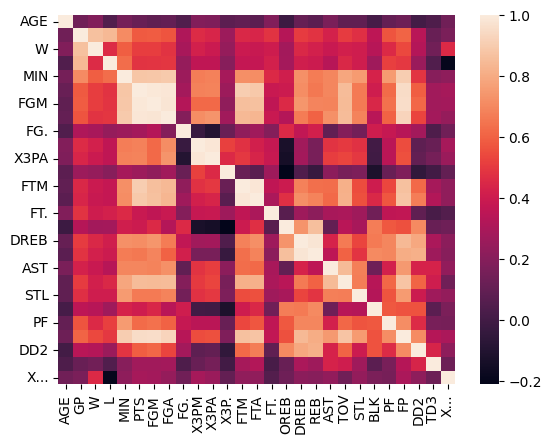

In [7]:
# Correlation between the variables
corr = nba.corr()
sns.heatmap(corr)
plt.show()

In [9]:
corr = nba.rcorr()
corr

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG.,X3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,X...
AGE,-,**,***,,***,*,*,*,,***,...,,***,*,*,,*,**,,,**
GP,0.138,-,***,***,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,*,***
W,0.185,0.867,-,***,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,**,***
L,0.044,0.84,0.457,-,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,,***
MIN,0.152,0.71,0.589,0.626,-,***,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
PTS,0.11,0.579,0.507,0.479,0.881,-,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
FGM,0.091,0.584,0.509,0.487,0.882,0.99,-,***,***,***,...,***,***,***,***,***,***,***,***,***,***
FGA,0.103,0.568,0.48,0.489,0.893,0.982,0.977,-,***,***,...,***,***,***,***,***,***,***,***,***,***
FG.,0.046,0.312,0.291,0.239,0.259,0.282,0.327,0.193,-,,...,***,*,***,***,***,***,***,***,,**
X3PM,0.187,0.457,0.419,0.359,0.67,0.68,0.617,0.715,-0.031,-,...,***,***,***,***,,***,***,,**,***


In [8]:
# Correlation between the variables with p-values (Pearson's correlation) with Bonferroni correction
corr = nba.rcorr(method = "pearson", padjust = "bonferroni")
corr

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG.,X3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,X...
AGE,-,,**,,,,,,,**,...,,,,,,,,,,
GP,0.138,-,***,***,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,,*
W,0.185,0.867,-,***,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,,***
L,0.044,0.84,0.457,-,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,,**
MIN,0.152,0.71,0.589,0.626,-,***,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
PTS,0.11,0.579,0.507,0.479,0.881,-,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
FGM,0.091,0.584,0.509,0.487,0.882,0.99,-,***,***,***,...,***,***,***,***,***,***,***,***,***,***
FGA,0.103,0.568,0.48,0.489,0.893,0.982,0.977,-,**,***,...,***,***,***,***,***,***,***,***,***,***
FG.,0.046,0.312,0.291,0.239,0.259,0.282,0.327,0.193,-,,...,***,,**,,***,***,***,***,,
X3PM,0.187,0.457,0.419,0.359,0.67,0.68,0.617,0.715,-0.031,-,...,,***,***,***,,***,***,,,***


In [15]:
# Correlation between the variables with p-values (Spearman's correlation) with Holm
nba.rcorr(method = "spearman", padjust = "holm")

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG.,X3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,X...
AGE,-,*,***,,**,**,*,*,,***,...,,***,*,,,,**,,,**
GP,0.143,-,***,***,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
W,0.213,0.871,-,***,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
L,0.046,0.809,0.492,-,***,***,***,***,***,***,...,***,***,***,***,***,***,***,***,,*
MIN,0.184,0.705,0.592,0.627,-,***,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
PTS,0.169,0.673,0.568,0.603,0.938,-,***,***,***,***,...,***,***,***,***,***,***,***,***,***,***
FGM,0.147,0.668,0.563,0.596,0.929,0.993,-,***,***,***,...,***,***,***,***,***,***,***,***,***,***
FGA,0.153,0.642,0.533,0.589,0.939,0.981,0.975,-,***,***,...,***,***,***,***,***,***,***,***,***,***
FG.,0.064,0.287,0.303,0.188,0.23,0.334,0.385,0.197,-,**,...,***,,***,**,***,***,***,***,,***
X3PM,0.206,0.488,0.432,0.416,0.676,0.656,0.602,0.696,-0.166,-,...,***,***,***,***,,***,***,***,**,**


- *Explain how these techniques work and what the main differences are between Holm and Bonferonni.*

Bonferonni correction works by dividing the significance level by the number of tests. Holm correction works by ordering the p-values from smallest to largest and then applying the Bonferonni correction to the first p-value. If the p-value is significant, then the corresponding hypothesis is rejected. If the p-value is not significant, then the corresponding hypothesis is not rejected and the next p-value is tested. This process is repeated until a significant p-value is found or all p-values have been tested.

- *What other correction techniques could have been used ?*

Some other correction techniques could have been used such as the Benjamini-Hochberg correction, the Sidak correction or the Skipped correction.

## 4. Market Basket Analysis

1. In the introduction of the Jupyter Notebook, define precisely the following metrics : support, lift, confidence, leverage and conviction. Plagiarism will not be tolerated, use your own words

- Support: The percentage of transactions in which a particular item or a set of items appear.
- Lift: The ratio of the observed support of a itemset to the expected support if the items were independent.
- Confidence: The probability that a customer who bought item A also bought item B. It is expressed as Confidence(A=>B) = (Support(A,B)) / Support(A).
- Leverage: The difference between the observed support of a itemset and the expected support if the items were independent.
- Conviction: The ratio of the expected probability that a item B is not bought if item A is not bought, to the actual probability that B is not bought if A is not bought. Conviction(A=>B) = 1 - (Support(B) / Support(A'=>B)).



2. Explain the notion of pruning, and how the a priori algorithm works with a chart of your own creation (i.e., not found online). Identify frequent itemsets using the apriori method (both using theses tags and retail data)

Pruning is the process of removing non-frequent itemsets from the search space. The a priori algorithm works by generating all possible itemsets of size k, then removing the non-frequent itemsets. This process is repeated until no more frequent itemsets are found.

In [3]:
thesesfr = pd.read_csv("Datasets/Market Basket Analysis/tel_samp_rec.csv", encoding="latin-1")
thesesfr

,Defence.date,Domains,Full.Text.Language,def.date,n.disc,these.id,disc1.lev1,disc1.lev2,disc1.lev3,disc2.lev1,...,n.tag,disc1.rec.lev1,disc1.rec.lev2,disc1.rec.lev3,disc2.rec.lev1,disc2.rec.lev2,disc2.rec.lev3,disc3.rec.lev1,disc3.rec.lev2,disc3.rec.lev3
0,2010/09/23,"Sciences du Vivant [q-bio] / Ecologie, Environ...",French,2010.0,1,tel-00662843v1,Sciences du Vivant [q-bio],"Ecologie, Environnement",Ecosystèmes,NaN,...,1,X,67 - Biologie des populations et écologie,"Ecologie, Environnement",NaN,NaN,NaN,NaN,NaN,NaN
1,2009/11/02,Sciences de l'Homme et Société,French,2009.0,1,tel-00491490v1,Sciences de l'Homme et Société,NaN,NaN,NaN,...,1,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1996/05/30,Sciences du Vivant [q-bio] / Alimentation et N...,French,1996.0,1,tel-01776364v1,Sciences du Vivant [q-bio],Alimentation et Nutrition,NaN,Sciences du Vivant [q-bio],...,2,X,68 - Biologie des organismes,Alimentation et Nutrition,NaN,NaN,NaN,NaN,NaN,NaN
3,2018/02/02,Informatique [cs] / Autre [cs.OH] \r\n\r\nInf...,French,2018.0,1,tel-02437294v1,Informatique [cs],Autre [cs.OH],NaN,Informatique [cs],...,2,V,27 - Informatique,NaN,V,27 - Informatique,NaN,NaN,NaN,NaN
4,2015/07/08,Informatique [cs] / Automatique \r\n\r\nInfor...,French,2015.0,1,tel-01245100v1,Informatique [cs],Automatique,NaN,Informatique [cs],...,2,V,27 - Informatique,NaN,V,27 - Informatique,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100041,2016/06/14,Sciences de l'environnement / Milieux et Chang...,English,2016.0,1,tel-02795098v1,Sciences de l'environnement,Milieux et Changements globaux,NaN,NaN,...,1,VIII,"37 - Météorologie, océanographie physique et p...",Milieux et Changements globaux,NaN,NaN,NaN,NaN,NaN,NaN
100042,2018/12/03,Sciences du Vivant [q-bio] / Neurosciences [q-...,French,2018.0,2,tel-02918021v1,Sciences du Vivant [q-bio],Neurosciences [q-bio.NC],NaN,Sciences de l'ingénieur [physics],...,2,X,69 - Neurosciences,Neurosciences [q-bio.NC],IX,"63 - Génie électrique, électronique, photoniqu...",Electromagnétisme,NaN,NaN,NaN
100043,2017/05/24,Sciences du Vivant [q-bio] / Sciences pharmace...,French,2017.0,1,tel-02917945v1,Sciences du Vivant [q-bio],Sciences pharmaceutiques,Pharmacologie,Sciences du Vivant [q-bio],...,2,pharmacie,87 - Sciences biologiques pharmaceutiques,Sciences pharmaceutiques,X,NaN,Cancer,NaN,NaN,NaN
100044,2017/07/03,Sciences du Vivant [q-bio] / Sciences pharmace...,French,2017.0,1,tel-02918194v1,Sciences du Vivant [q-bio],Sciences pharmaceutiques,NaN,NaN,...,1,pharmacie,87 - Sciences biologiques pharmaceutiques,Sciences pharmaceutiques,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
thesesfr.columns

Index(['Defence.date', 'Domains', 'Full.Text.Language', 'def.date', 'n.disc',
       'these.id', 'disc1.lev1', 'disc1.lev2', 'disc1.lev3', 'disc2.lev1',
       'disc2.lev2', 'disc2.lev3', 'disc3.lev1', 'disc3.lev2', 'disc3.lev3',
       'n.tag', 'disc1.rec.lev1', 'disc1.rec.lev2', 'disc1.rec.lev3',
       'disc2.rec.lev1', 'disc2.rec.lev2', 'disc2.rec.lev3', 'disc3.rec.lev1',
       'disc3.rec.lev2', 'disc3.rec.lev3'],
      dtype='object')

In [16]:
thesesfr[["disc1.rec.lev1", "disc1.rec.lev2", "disc2.rec.lev1"]]

,disc1.rec.lev1,disc1.rec.lev2,disc2.rec.lev1
0,X,67 - Biologie des populations et écologie,NaN
1,IV,NaN,NaN
2,X,68 - Biologie des organismes,NaN
3,V,27 - Informatique,V
4,V,27 - Informatique,V
...,...,...,...
100041,VIII,"37 - Météorologie, océanographie physique et p...",NaN
100042,X,69 - Neurosciences,IX
100043,pharmacie,87 - Sciences biologiques pharmaceutiques,X
100044,pharmacie,87 - Sciences biologiques pharmaceutiques,NaN


In [69]:
# Apply mba on disc1.lev1 and disc1.lev2

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# Prepare the dataset with itemsets as the columns and the thesis for each row
itemsets = thesesfr[["disc1.rec.lev1", "disc2.rec.lev1"]]
itemsets[["disc1.rec.lev1"]] = itemsets[["disc1.rec.lev1"]].astype(str)
itemsets[["disc2.rec.lev1"]] = itemsets[["disc2.rec.lev1"]].astype(str)

# Drop if "nan" is in the itemset
itemsets.drop(itemsets[itemsets["disc1.rec.lev1"] == "nan"].index, inplace = True)
itemsets.drop(itemsets[itemsets["disc2.rec.lev1"] == "nan"].index, inplace = True)
itemsets = itemsets.values.tolist()
te = TransactionEncoder()
te_ary = te.fit(itemsets).transform(itemsets)
itemsets = pd.DataFrame(te_ary, columns=te.columns_)
itemsets

,I,I - Droit,II,III,IV,IX,V,VI,VII,VIII,X,XII,pharmacie
0,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,True,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16676,False,False,False,False,False,False,False,False,True,True,False,False,False
16677,False,False,False,False,False,False,True,False,False,False,False,False,False
16678,False,False,True,False,True,False,False,False,False,False,False,False,False
16679,False,False,False,False,False,True,False,False,False,False,True,False,False


In [70]:
frequent_itemsets = apriori(itemsets, min_support=0.0000005, use_colnames=True)
frequent_itemsets["length"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.010311,(I),1
1,0.004736,(I - Droit),1
2,0.028296,(II),1
3,0.031413,(III),1
4,0.121456,(IV),1
...,...,...,...
70,0.009172,"(VIII, X)",2
71,0.000120,"(VIII, XII)",2
72,0.000540,"(pharmacie, VIII)",2
73,0.001679,"(X, XII)",2


In [95]:
frequent_association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
frequent_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(I - Droit),(I),0.004736,0.010311,0.001139,0.240506,23.324919,0.001090,1.303090
1,(I),(I - Droit),0.010311,0.004736,0.001139,0.110465,23.324919,0.001090,1.118859
2,(IV),(I),0.121456,0.010311,0.007853,0.064659,6.270837,0.006601,1.058105
3,(I),(IV),0.010311,0.121456,0.007853,0.761628,6.270837,0.006601,3.685601
4,(I - Droit),(II),0.004736,0.028296,0.000659,0.139241,4.920913,0.000525,1.128892
5,(I - Droit),(IV),0.004736,0.121456,0.002218,0.468354,3.856180,0.001643,1.652500
6,(I - Droit),(XII),0.004736,0.039146,0.000240,0.050633,1.293427,0.000054,1.012099
7,(IV),(II),0.121456,0.028296,0.011930,0.098223,3.471313,0.008493,1.077544
8,(II),(IV),0.028296,0.121456,0.011930,0.421610,3.471313,0.008493,1.518949
9,(II),(IX),0.028296,0.333613,0.002758,0.097458,0.292128,-0.006682,0.738344


3. Create visualizations of association rules with plotly when possible. You can find interactive plotly graphs, in the MBA dataset folder, and R codes to produce interactive graphs at this address. You should produce, among other graphs, support / lift scatterplots, parallel plots, and heatmaps.

In [96]:
frequent_association_rules.antecedents = frequent_association_rules.antecedents.apply(lambda x: ', '.join(list(x))).astype("unicode")
frequent_association_rules.consequents = frequent_association_rules.consequents.apply(lambda x: ', '.join(list(x))).astype("unicode")

In [97]:
px.scatter(frequent_association_rules, x="support", y="confidence", color="lift", size="lift", hover_data=["antecedents", "consequents"])

In [103]:
# Parallel plot of antecedents and consequents
px.parallel_categories(frequent_association_rules, dimensions=["antecedents", "consequents"], color="support", color_continuous_scale=px.colors.sequential.Inferno)

In [101]:
# Make a heatmap of the results
px.density_heatmap(frequent_association_rules, x="antecedents", y="consequents", z="support")

What are the insights that you get from such visualizations ? Elaborate with a 5 to 10 lines long paragraph

The insights that I get from such visualizations are that there are some correlations that seem more important than each other. The link between category V and IX seem very strong. Probably because those two categories are Mathematiques and Informatiques. Unfortunately, a lot of the results are quite obvious like this one. 

## 5. Exploring sequential data

### 5.2 Simple motif extraction with the n-gram approach